In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [86]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [52]:
data = pd.read_csv("/content/drive/MyDrive/Real estate.csv")

In [53]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


## Inputs and Labels

In [120]:
X = data.iloc[:,1:7].values
Y = data.iloc[:,7].values

In [121]:
X

array([[2012.9,   32. ,   84.9,   10. ,   25. ,  121.5],
       [2012.9,   19.5,  306.6,    9. ,   25. ,  121.5],
       [2013.6,   13.3,  562. ,    5. ,   25. ,  121.5],
       ...,
       [2013.2,   18.8,  391. ,    7. ,   25. ,  121.5],
       [2013. ,    8.1,  104.8,    5. ,   25. ,  121.5],
       [2013.5,    6.5,   90.5,    9. ,   25. ,  121.5]])

In [122]:
Y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

## Handling missing values if any 

In [161]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)

In [162]:
X.shape

(414, 6)

## Train Test split 

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 50)

In [196]:
X_test.shape

(125, 6)

In [197]:
from sklearn.preprocessing import Normalizer
sc = Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


In [198]:
X_train

array([[1.0e+00, 1.5e-02, 7.1e-02, 4.0e-03, 1.2e-02, 6.0e-02],
       [8.0e-01, 1.2e-02, 5.9e-01, 8.0e-04, 1.0e-02, 4.8e-02],
       [1.0e+00, 3.2e-03, 4.5e-02, 4.5e-03, 1.2e-02, 6.0e-02],
       ...,
       [6.8e-01, 1.4e-03, 7.3e-01, 1.0e-03, 8.5e-03, 4.1e-02],
       [9.7e-01, 1.0e-02, 2.5e-01, 1.9e-03, 1.2e-02, 5.8e-02],
       [4.0e-01, 2.8e-03, 9.2e-01, 0.0e+00, 5.0e-03, 2.4e-02]])

## Fitting the model

In [199]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

## Predicting on the test set 

In [200]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 1)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))


[[42.3 48.5]
 [29.6 23. ]
 [19.6 25.3]
 [47.8 39.7]
 [37.1 46.4]
 [23.  24.7]
 [45.2 40.2]
 [49.8 57.8]
 [39.1 40.5]
 [47.5 47. ]
 [45.  57.1]
 [42.7 48. ]
 [23.3 27. ]
 [21.  26.6]
 [23.5 25.3]
 [34.3 48. ]
 [52.9 73.6]
 [46.3 55. ]
 [36.7 36.6]
 [24.2 26.6]
 [50.2 55.1]
 [23.  25.9]
 [42.2 40.9]
 [18.1 19.2]
 [54.2 58. ]
 [18.  14.7]
 [44.3 44.3]
 [49.4 54.4]
 [27.  23.9]
 [23.4 22.8]
 [25.4 23.2]
 [55.5 58.1]
 [28.5 29.3]
 [40.7 42.2]
 [37.8 25. ]
 [26.7 20.8]
 [21.8 26.2]
 [32.6 35.6]
 [48.3 42.2]
 [33.4 35.7]
 [50.4 42.8]
 [54.1 44.7]
 [41.6 40. ]
 [49.8 44. ]
 [30.  20.9]
 [48.4 47.3]
 [19.7 18.3]
 [40.8 63.3]
 [51.2 56.8]
 [17.5 45.1]
 [49.4 41.2]
 [24.5 30.1]
 [34.  39.7]
 [38.5 34.6]
 [19.  12.2]
 [42.4 40.8]
 [23.2 28.4]
 [33.8 62.9]
 [34.4 28.9]
 [39.  24.5]
 [27.1 27.7]
 [33.6 31.5]
 [23.9 25.6]
 [29.3 30.8]
 [46.9 38.1]
 [45.  48.1]
 [27.6 23.6]
 [52.6 50.4]
 [43.3 42. ]
 [42.4 41. ]
 [29.4 22.1]
 [44.8 42.3]
 [27.4 23.1]
 [32.2 30.7]
 [47.9 54.8]
 [25.4 23.8]
 [37.5 40.6]

In [201]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,Y_pred))

0.6783666575862342


In [202]:
from sklearn.metrics import r2_score
print(r2_score(Y_train,regressor.predict(X_train)))

0.6481944444612766


In [190]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(Y_test, Y_pred)
MSE= metrics.mean_squared_error(Y_test, Y_pred)
RMSE= np.sqrt(MSE)

In [191]:
MAE

5.321683388443474

In [192]:
MSE

88.85504481275647

In [193]:
RMSE

9.426295391762157

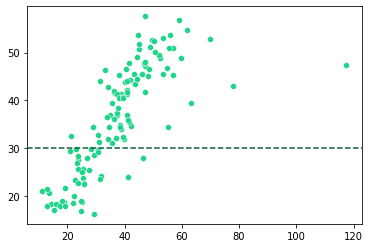

In [194]:
sns.scatterplot(x=Y_test, y=Y_pred, color='#20d489')
plt.axhline(y=30, color='#105c3c', ls='--')
